<a href="https://colab.research.google.com/github/OmprakashDebata/Email_Spam_detection-NLP/blob/main/Email_Spam_Detection.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [ ]:
!pip install nltk
!pip install lq wordcloud

  Preparing metadata (setup.py) ... done
  Created wheel for lq: filename=LQ-1.1.1-py3-none-any.whl size=1208 sha256=983ce759c9d5e9468f8267dbb5c105c5c3c723f135c0e30d67c18291048cfabd
  Stored in directory: /root/.cache/pip/wheels/35/6d/88/4657ff0e60f8686e7bea04b06d2227ce65fd7dc2689c0467f2
Successfully built lq


In [1]:
import wordcloud
import nltk
nltk.download('stopwords')
nltk.download('wordnet')
nltk.download('punkt')
nltk.download('averaged_perceptron_tagger')
# import warning
import warnings
warnings.filterwarnings('ignore')

[nltk_data] Downloading package stopwords to /root/nltk_data...
[nltk_data]   Unzipping corpora/stopwords.zip.
[nltk_data] Downloading package wordnet to /root/nltk_data...
[nltk_data] Downloading package punkt to /root/nltk_data...
[nltk_data]   Unzipping tokenizers/punkt.zip.
[nltk_data] Downloading package averaged_perceptron_tagger to
[nltk_data]     /root/nltk_data...
[nltk_data]   Unzipping taggers/averaged_perceptron_tagger.zip.


In [2]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.feature_extraction.text import TfidfVectorizer
from sklearn.naive_bayes import MultinomialNB
from sklearn.model_selection import train_test_split
from sklearn.metrics import accuracy_score, confusion_matrix, classification_report
from sklearn.svm import SVC


In [3]:
df = pd.read_csv('/content/messages.csv')
df.head()

,subject,message,label
0,job posting - apple-iss research center,content - length : 3386 apple-iss research cen...,0
1,NaN,"lang classification grimes , joseph e . and ba...",0
2,query : letter frequencies for text identifica...,i am posting this inquiry for sergei atamas ( ...,0
3,risk,a colleague and i are researching the differin...,0
4,request book information,earlier this morning i was on the phone with a...,0


In [4]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 2893 entries, 0 to 2892
Data columns (total 3 columns):
 #   Column   Non-Null Count  Dtype 
---  ------   --------------  ----- 
 0   subject  2831 non-null   object
 1   message  2893 non-null   object
 2   label    2893 non-null   int64 
dtypes: int64(1), object(2)
memory usage: 67.9+ KB


In [5]:
print('Shape of dataset:', df.shape)

Shape of dataset: (2893, 3)


In [6]:
df.isnull().sum()

subject    62
message     0
label       0
dtype: int64

In [7]:
print('Count of label\n', df['label'].value_counts())

Count of label
 0    2412
1     481
Name: label, dtype: int64


In [8]:
## checking the Ratio of label
print('Not a Spam Email Ratio 0 label:', round(len(df[df['label']==0]) / len(df['label']),2)*100, '%')
print('Not a Spam Email Ratio 0 label:', round(len(df[df['label']==1]) / len(df['label']),2)*100, '%')

Not a Spam Email Ratio 0 label: 83.0 %
Not a Spam Email Ratio 0 label: 17.0 %


In [9]:
df['Length'] = df.message.str.len()
df.head()

,subject,message,label,Length
0,job posting - apple-iss research center,content - length : 3386 apple-iss research cen...,0,2856
1,NaN,"lang classification grimes , joseph e . and ba...",0,1800
2,query : letter frequencies for text identifica...,i am posting this inquiry for sergei atamas ( ...,0,1435
3,risk,a colleague and i are researching the differin...,0,324
4,request book information,earlier this morning i was on the phone with a...,0,1046


In [11]:
df['message'] = df.message.str.lower()
df.head()

,subject,message,label,Length
0,job posting - apple-iss research center,content - length : 3386 apple-iss research cen...,0,2856
1,NaN,"lang classification grimes , joseph e . and ba...",0,1800
2,query : letter frequencies for text identifica...,i am posting this inquiry for sergei atamas ( ...,0,1435
3,risk,a colleague and i are researching the differin...,0,324
4,request book information,earlier this morning i was on the phone with a...,0,1046


In [12]:
# replace email address with 'email'
df['message'] = df['message'].str.replace(r'^.+@[^\.].*\.[a-z]{2,}$','emailaddress')
# Replace URLs with 'webaddress'
df['message'] = df['message'].str.replace(r'^http\://[a-zA-Z0-9\-\.]+\.[a-zA-Z]{2,3}(/\S*)?$','webaddress')
# Replace currency symbols with 'moneysymb' (£ can be typrd with ALT Key + 156)
df['message'] = df['message'].str.replace(r'£|\$', 'dollers')
# Replace 10 digit phone numbers (formats include paranthesis, spaces, no spaces, dashes) with 'Phonenumber'
df['message'] = df['message'].str.replace(r'^\(?[\d]{3}\)?[\s-]?[\d]{3}[\s-]?[\d]{4}$','phonenumber')
# Replace numeric chards with 'numbr'
df['message'] = df['message'].str.replace(r'\d+(\.\d+)?', 'numbr')

In [13]:
# remove puncuations
df['message'] = df['message'].str.replace(r'[^\w\d\s]', ' ')
# replace whitespace btw terms with single space
df['message'] = df['message'].str.replace(r'\s+', ' ')
# remove leading and trailing whitespace
df['message'] = df['message'].str.replace(r'^\s+?$', '')

In [14]:
df.head()

,subject,message,label,Length
0,job posting - apple-iss research center,content length numbr apple iss research center...,0,2856
1,NaN,lang classification grimes joseph e and barbar...,0,1800
2,query : letter frequencies for text identifica...,i am posting this inquiry for sergei atamas sa...,0,1435
3,risk,a colleague and i are researching the differin...,0,324
4,request book information,earlier this morning i was on the phone with a...,0,1046


In [15]:
import string
from nltk.corpus import stopwords

# Download stopwords
nltk.download('stopwords')

# Set custom stopwords
stop_words = set(stopwords.words('english') + ['u', 'ü', 'ur', '4', '2', 'im', 'dont', 'doin', 'ure'])

# Apply stopwords removal to the 'message' column in your DataFrame
df['message'] = df['message'].apply(lambda x: " ".join(term for term in x.split() if term not in stop_words))

[nltk_data] Downloading package stopwords to /root/nltk_data...
[nltk_data]   Package stopwords is already up-to-date!


In [16]:
# new column (clean_length) after punctuations, stopwords removal
df['clean_length'] = df.message.str.len()
df.head()

,subject,message,label,Length,clean_length
0,job posting - apple-iss research center,content length numbr apple iss research center...,0,2856,2179
1,NaN,lang classification grimes joseph e barbara f ...,0,1800,1454
2,query : letter frequencies for text identifica...,posting inquiry sergei atamas satamas umabnet ...,0,1435,1064
3,risk,colleague researching differing degrees risk p...,0,324,210
4,request book information,earlier morning phone friend mine living south...,0,1046,629


In [17]:
# total length removal
print('Original Length:', df.Length.sum())
print('Cleaned Length:', df.clean_length.sum())
print('Totall words Removed:', (df.Length.sum()) - (df.clean_length.sum()))

Original Length: 9344743
Cleaned Length: 6767857
Totall words Removed: 2576886


In [18]:
print(df.label.value_counts())

0    2412
1     481
Name: label, dtype: int64


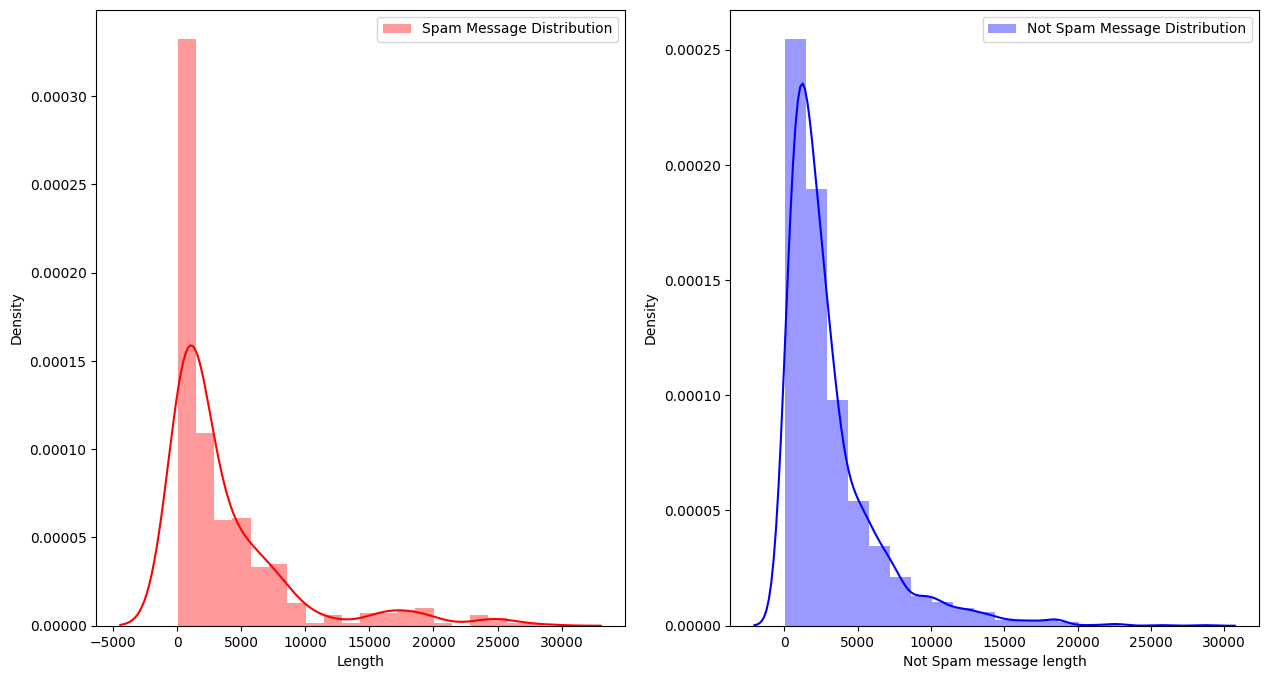

In [19]:
f,ax = plt.subplots(1,2,figsize=(15,8))
sns.distplot(df[df['label']==1]['Length'], bins=20, ax=ax[0], label='Spam Message Distribution', color='r')
ax[0].legend()

sns.distplot(df[df['label']==0]['Length'], bins=20, ax=ax[1], label='Not Spam Message Distribution', color='b')
ax[1].set_xlabel('Not Spam message length')
ax[1].legend()

plt.show()